# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
geocode_url = "http://api.openweathermap.org/geo/1.0/direct?"
weather_url = "https://api.openweathermap.org/data/2.5/weather?"
weather_df = pd.DataFrame()

weather_df["City"] = []
weather_df["Latitude"] = []
weather_df["Longitude"] = []
weather_df["Temperature (F)"] = []
weather_df["Humidity"] = []
weather_df["Cloudiness"] = []
weather_df["Wind Speed (mph)"] = []

count = 0


for city in cities:
    try:
        response = requests.get(f"{geocode_url}q={city}&appid={weather_api_key}").json()
        lat = response[0]["lat"]
        lon = response[0]["lon"]
        name = response[0]["name"]

        response2 = requests.get(f"{weather_url}lat={lat}&lon={lon}&appid={weather_api_key}&units=imperial").json()
        count += 1
        print(f"Checking the weather for City #{count}. {name}")
        weather_df.loc[len(weather_df.index)] = [name, 
                                                lat, 
                                                lon,
                                                response2["main"]["temp"],
                                                response2["main"]["humidity"], 
                                                response2["clouds"]["all"], 
                                                response2["wind"]["speed"]]
    except:
        print("Unable to locate data. Skipping City...")

Checking the weather for City #1. Moose Factory
Checking the weather for City #2. Yellowknife
Checking the weather for City #3. Hilo CDP
Checking the weather for City #4. Havøysund - Ávanuorri
Checking the weather for City #5. Carnarvon
Checking the weather for City #6. Butaritari
Checking the weather for City #7. Manta
Checking the weather for City #8. Vaitupu
Checking the weather for City #9. St. George's
Checking the weather for City #10. Wewak
Checking the weather for City #11. Ittoqqortoormiit
Checking the weather for City #12. Katsuura
Checking the weather for City #13. Ilulissat
Checking the weather for City #14. Okha
Checking the weather for City #15. Rikitea
Checking the weather for City #16. Hobart
Checking the weather for City #17. Marawi
Checking the weather for City #18. Vila Franca do Campo
Checking the weather for City #19. North Bend
Checking the weather for City #20. Ayan
Checking the weather for City #21. Paracuru
Checking the weather for City #22. New Norfolk
Checkin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Display DataFrame
weather_df

,City,Latitude,Longitude,Temperature (F),Humidity,Cloudiness,Wind Speed (mph)
0,Moose Factory,51.260217,-80.603282,37.38,87,100,11.50
1,Yellowknife,62.454081,-114.377385,48.22,57,83,5.01
2,Hilo CDP,19.707373,-155.081580,80.28,74,40,6.91
3,Havøysund - Ávanuorri,70.996311,24.660958,44.83,93,100,41.14
4,Carnarvon,-24.882613,113.657649,68.00,37,0,21.45
...,...,...,...,...,...,...,...
584,Vestmanna,62.156000,-7.166000,45.64,87,75,3.44
585,Narayanganj,23.623673,90.498807,84.22,78,94,3.36
586,Hervey Bay,-25.298578,152.853522,77.02,58,84,7.00
587,Arcata,40.866517,-124.082840,57.15,88,100,3.47


In [5]:
#Creates a new .csv file called weather_data.csv
weather_df.to_csv("weather_data.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%. 
#  The returned dataframe contains no entries with humidity > 100. 
#  Therefore we are skipping this section.

weather_df[weather_df["Humidity"] > 100]

,City,Latitude,Longitude,Temperature (F),Humidity,Cloudiness,Wind Speed (mph)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

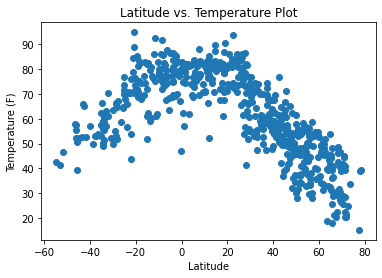

In [7]:
plt.scatter(weather_df["Latitude"], weather_df["Temperature (F)"])
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()

### Analysis

This code analyzes the latitude of each city and plots it against the temperature in Fahrenheit for that city.
The trend shown by the graph matches what we would expect geographically, which is that cities located closer to the 
poles (latitude of higher magnitude) experience a lower temperature than those closer to the equator (latitude of 0).



## Latitude vs. Humidity Plot

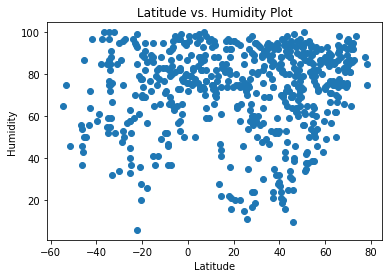

In [8]:
plt.scatter(weather_df["Latitude"], weather_df["Humidity"])
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

### Analysis

This code analyzes the latitude of each city and plots it against the Humidity index for that city.
There is no clear insight that can be quickly concluded from this data, however it seems that a higher density of cities that experience high levels of humidity are concentrated around the 40-70 latitude range.

## Latitude vs. Cloudiness Plot

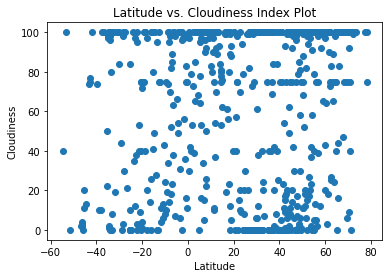

In [9]:
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"])
plt.title("Latitude vs. Cloudiness Index Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

### Analysis

This code analyzes the latitude of each city and plots it against the Cloudiness index for that city.
It seems as though there are no apparent trends for cloudiness in cities with relation to latitude, however a large number of data points are concentrated at either 0 or 100 showing either no or full cloud coverage.

## Latitude vs. Wind Speed Plot

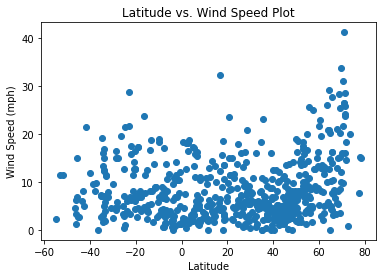

In [10]:
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed (mph)"])
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

### Analysis

This code analyzes the latitude of each city and plots it against the Wind Speed in miles per hour for that city.
The trend shown by the graph indicates that for all latitudes, wind speed ranges primarily from 0 to 10 mph, however areas far to the north experience higher wind speeds than those with a lower latitude.

## Linear Regression

In [11]:
#Stratifying our data based on latitude
northern_df = weather_df[weather_df["Latitude"] >= 0]
southern_df = weather_df[weather_df["Latitude"] < 0]
north_x = northern_df["Latitude"]
south_x = -southern_df["Latitude"]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

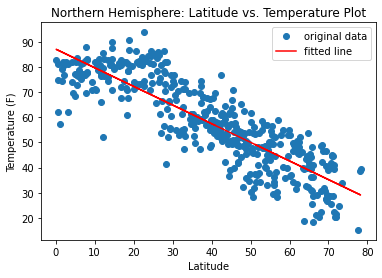

In [12]:
north_y = northern_df["Temperature (F)"]
res = st.linregress(north_x, north_y)
plt.plot(north_x, north_y, 'o', label='original data')
plt.plot(north_x, res.intercept + res.slope*north_x, 'r', label='fitted line')
plt.legend()
plt.title("Northern Hemisphere: Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()

### Analysis

This code analyzes the latitude of each city and plots it against the temperature in Fahrenheit for that city for values in the Northern Hemisphere.
The trend shown by the graph matches what we would expect geographically, which is that as latitude increases towards the North, the cooler the temperature will be.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

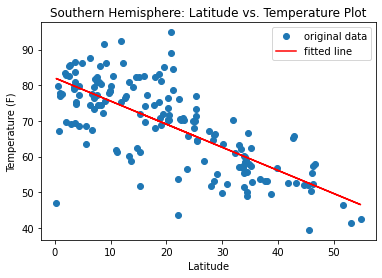

In [13]:
south_y = southern_df["Temperature (F)"]
res = st.linregress(south_x, south_y)
plt.plot(south_x, south_y, 'o', label='original data')
plt.plot(south_x, res.intercept + res.slope*south_x, 'r', label='fitted line')
plt.legend()
plt.title("Southern Hemisphere: Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.show()

### Analysis

This code analyzes the latitude of each city and plots it against the temperature in Fahrenheit for that city for values in the Southern Hemisphere.
The trend shown by the graph matches what we would expect geographically, which is that as the magnitude of the latitude increases towards the South, the cooler the temperature will be.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

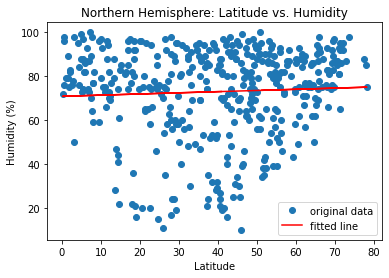

In [14]:
north_y = northern_df["Humidity"]
res = st.linregress(north_x, north_y)
plt.plot(north_x, north_y, 'o', label='original data')
plt.plot(north_x, res.intercept + res.slope*north_x, 'r', label='fitted line')
plt.legend()
plt.title("Northern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

### Analysis

This code analyzes the latitude of each city and plots it against the Humidity index for that city for values in the Northern Hemisphere.
Since the line of best fit seems to have a smaller slope, it suggests that humidity may not change as a result of a change in latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

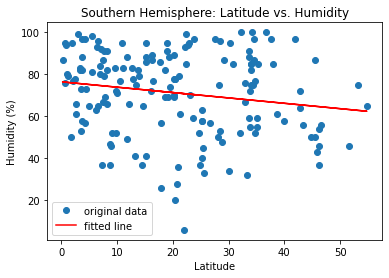

In [15]:
south_y = southern_df["Humidity"]
res = st.linregress(south_x, south_y)
plt.plot(south_x, south_y, 'o', label='original data')
plt.plot(south_x, res.intercept + res.slope*south_x, 'r', label='fitted line')
plt.legend()
plt.title("Southern Hemisphere: Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

### Analysis

This code analyzes the latitude of each city and plots it against the Humidity index for that city for values in the Southern Hemisphere.
Since the line of best fit seems to have a smaller slope, it suggests that humidity may not change as a result of a change in latitude. The only difference here is that humidity seems to decrease the farther South the city is located.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

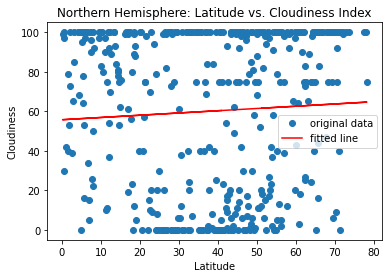

In [16]:
north_y = northern_df["Cloudiness"]
res = st.linregress(north_x, north_y)
plt.plot(north_x, north_y, 'o', label='original data')
plt.plot(north_x, res.intercept + res.slope*north_x, 'r', label='fitted line')
plt.legend()
plt.title("Northern Hemisphere: Latitude vs. Cloudiness Index")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

### Analysis

This code analyzes the latitude of each city and plots it against the Cloudiness index for that city for values in the Northern Hemisphere.
Since the line of best fit seems to have a smaller slope, it suggests that cloudiness may not change as a result of a change in latitude. It does suggest that as latitude increases farther to the North, cloudiness increases as well.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

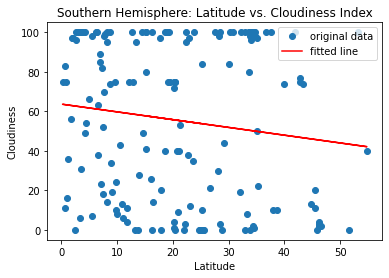

In [17]:
south_y = southern_df["Cloudiness"]
res = st.linregress(south_x, south_y)
plt.plot(south_x, south_y, 'o', label='original data')
plt.plot(south_x, res.intercept + res.slope*south_x, 'r', label='fitted line')
plt.legend()
plt.title("Southern Hemisphere: Latitude vs. Cloudiness Index")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

### Analysis

This code analyzes the latitude of each city and plots it against the Cloudiness index for that city for values in the Southern Hemisphere.
The line of best fit suggests that as latitude increases farther to the South, cloudiness decreases.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

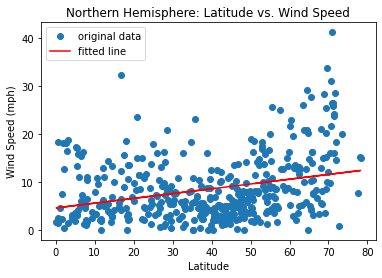

In [18]:
north_y = northern_df["Wind Speed (mph)"]
res = st.linregress(north_x, north_y)
plt.plot(north_x, north_y, 'o', label='original data')
plt.plot(north_x, res.intercept + res.slope*north_x, 'r', label='fitted line')
plt.legend()
plt.title("Northern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

### Analysis

This code analyzes the latitude of each city and plots it against the Wind Speed for that city for values in the Northern Hemisphere.
The line of best fit suggests that as latitude trends towards the North, wind speed in mph increases for each city. We can also see that most cities have a wind speed of 0-10 mph.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

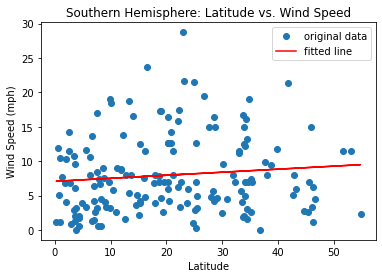

In [19]:
south_y = southern_df["Wind Speed (mph)"]
res = st.linregress(south_x, south_y)
plt.plot(south_x, south_y, 'o', label='original data')
plt.plot(south_x, res.intercept + res.slope*south_x, 'r', label='fitted line')
plt.legend()
plt.title("Southern Hemisphere: Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

### Analysis

This code analyzes the latitude of each city and plots it against the Wind Speed for that city for values in the Southern Hemisphere.
The line of best fit suggests that as latitude trends towards the South, wind speed in mph increases for each city. However since the line of best fit is almost horizontal, the rate at which wind speed increases in relation to latitude is not that high.

### Three observable trends

1. Temperature increases as latitude trends towards the Equator (a value of 0) and decreases as it trends away from the Equator.

2. In the Northern Hemisphere, wind speed increases as latitude increases.

3. There seems to be no correlation between latitude and cloudiness index, however, data points seem to be concentrated on cloudiness indexes of 100 or 0 indicating that most locations are either cloudless or have full cloud coverage.